In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('customer_booking.csv')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.describe()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [21]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [24]:
df.dtypes

num_passengers             int64
sales_channel              int32
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [69]:
df = df[['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']]

In [9]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [17]:
df.sales_channel = (df.sales_channel == 'Internet').astype(int)

C:\Users\ACER-PC\AppData\Local\Temp\ipykernel_4288\608248491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sales_channel = (df.sales_channel == 'Internet').astype(int)


In [10]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [25]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0


##### Percentage of Sales channel

In [37]:
internet = df.sales_channel.value_counts().values[0]  / (len(df.sales_channel)) * 100
mobile = df.sales_channel.value_counts().values[1]  / (len(df.sales_channel)) * 100
print(f"The number of bookings done through Internet: {internet}%")
print(f"The number of bookings done through Mobile: {mobile}%")

The number of bookings done through Internet: 88.764%
The number of bookings done through Mobile: 11.236%


In [ ]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

##### Percentage of trip usage

In [38]:
round_trip = df.trip_type.value_counts().values[0]  / (len(df.trip_type)) * 100
one_way = df.trip_type.value_counts().values[1]  / (len(df.trip_type)) * 100
circle_trip = df.trip_type.value_counts().values[2]  / (len(df.trip_type)) * 100

print(f"The number of trips done through round_trip: {round_trip}%")
print(f"The number of trips done through one_way: {one_way}%")
print(f"The number of trips done through circle_trip: {circle_trip}%")

The number of trips done through round_trip: 98.994%
The number of trips done through one_way: 0.774%
The number of trips done through circle_trip: 0.232%


Text(0.5, 1.0, ' PURCHASE LEAD')

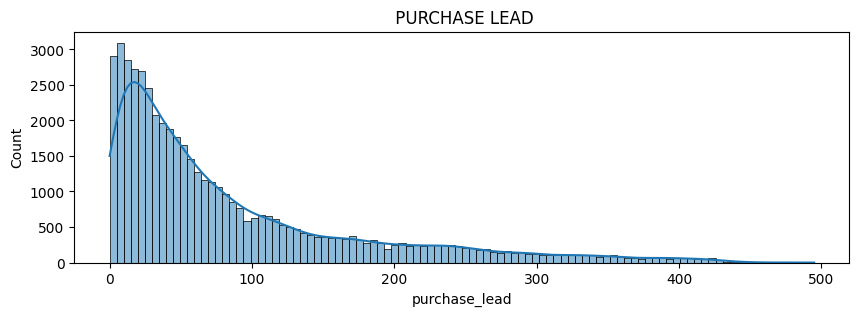

In [86]:
plt.figure(figsize=(10,3))
ax = sns.histplot( df.purchase_lead, bins=100, kde=True)
ax.set_title(' PURCHASE LEAD')

In [70]:
df[df.purchase_lead > 500].booking_complete.value_counts()

#filtering the data to have only purchase lead days less than 500 
df = df[df.purchase_lead < 500]

Text(0.5, 1.0, 'LENGTH OF STAY')

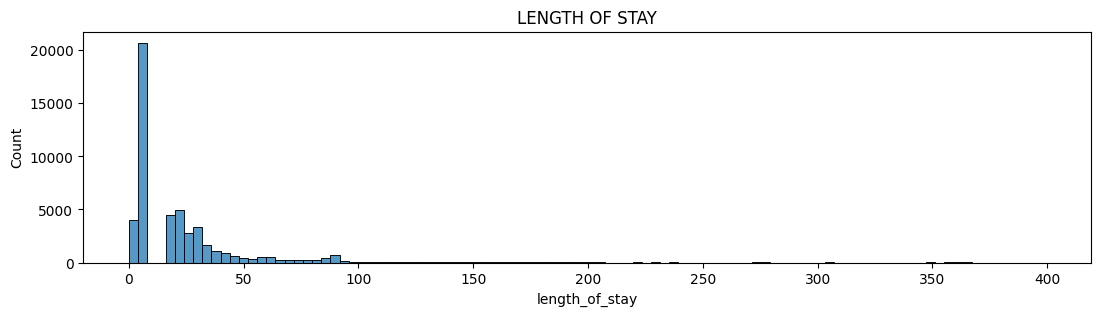

In [87]:
plt.figure(figsize=(13, 3))
ax = sns.histplot(df.length_of_stay, bins=100)
ax.set_title('LENGTH OF STAY')

In [83]:
df[df.length_of_stay >400].booking_complete.value_counts()

#filtering the data to have only length of days less than 400 days
df = df[df.length_of_stay < 400]

In [88]:
# FLIGHT DAY

mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [89]:
df.flight_day.value_counts()

flight_day
1    8096
3    7670
2    7667
4    7418
5    6758
7    6549
6    5807
Name: count, dtype: int64